In [1]:
import numpy as np
import scipy.io as sio
from PIL import Image as im 
from scipy.sparse import csr_matrix
from os.path import dirname, join as pjoin
import mat73
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

Mat1 = '16384x16384/fd18.mat'
Mat2 = '16384x16384/fe_sphere.mat'
Mat3 = '16384x16384/ncvxqp9.mat'
Mat4 = '16384x16384/delaunay_n14.mat'
Mat5 = '16384x16384/pds10.mat'
Mat6 = '16384x16384/sinc18.mat'

mat_size = 16384


In [2]:

# functions
class Text:
    BOLD_START = '\033[1m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'

#loading matrixes
def load_matrix(name):
    
    load = sio.loadmat(name) 
    inputM = np.zeros((mat_size,mat_size), dtype = float)
    inputM = load['Problem']['A']
    M = inputM[0][0]
    repr(M)
    M = M.toarray()
    M = M[0:mat_size,0:mat_size]
    return M

######################################################################

def Bit_mapping_value(M, row, col, chunk_size):
    flag = 0
    i = 0
    while(i < chunk_size):
        j = 0
        while(j < chunk_size):
            if(i+row < M.shape[0] and j+col < M.shape[1]):
                if(M[i+row][j+col] != 0):
                    flag = 1
                    return flag
            j = j+1
        i = i +1    
    return flag  

#####################################################################    
        
def Bit_mapping(M, mat_size, chunk_size):
    
    bit_mapped = np.zeros((mat_size//chunk_size, mat_size//chunk_size), dtype = int)
    if(bit_mapped.shape[0] >= 2):
        k = 0
        i = 0
        while (i < mat_size):
            j = 0
            t = 0
            while(j < mat_size):
                bit_mapped[k][t] = Bit_mapping_value(M, i, j, chunk_size)
                j = j + chunk_size 
                t = t+1
            i = i + chunk_size
            k = k +1
    return bit_mapped

####################################################################
## assume that bit mapped row size is dividable by 2
## diving to two parts top and bottom

def cal_non_overlap_rate(bit_mapped):
    bm_size = bit_mapped.shape[0]
    rate = 0
    #bm_cols = bit_mapped.shape[1]
    if(bm_size >1):
        num_overlaps = 0
        for i in range(0, bm_size//2, 1):
            for j in range (0, bm_size, 1):
                if (bit_mapped[i][j] != 0 and bit_mapped[i+bm_size//2][j] != 0):
                    num_overlaps = num_overlaps+1
        print("num of overlaps = ", num_overlaps)
        rate = 1 - ((num_overlaps)*2)/(bm_size*bm_size)
    
    return rate

####################################################################
def find_optimal_chunk_size(rates, chunk_sizes):
    optimal_chunk = 0;
    for i in range(len(rates)):
        if(rates[i] > 95):
            if(chunk_sizes[i] > optimal_chunk):
                optimal_chunk = chunk_sizes[i]
    return optimal_chunk
#############################################################
def count_num_nonzero(elem1, elem2, elem3, elem4):
    count = 0
    if(elem1 == 1):
        count= count+1
    if(elem2 == 1):
        count= count+1
    if(elem3 == 1):
        count= count+1
    if(elem4 == 1):
        count= count+1
    return count

##########################################################################
def cal_non_overlap_rate_4partition(bit_mapped):
    bm_size = bit_mapped.shape[0]
    rate = 0
    #bm_cols = bit_mapped.shape[1]
    if(bm_size >=4):
        num_overlaps = 0
        for i in range(0, bm_size//4, 1):
            for j in range (0, bm_size, 1 ):
                if (count_num_nonzero(bit_mapped[i][j], bit_mapped[i+bm_size//4][j],
                                      bit_mapped[i+2*(bm_size//4)][j], bit_mapped[i+3*(bm_size//4)][j]) > 1):
                    num_overlaps = num_overlaps+1
        print("num of overlaps for FOUR partition = ", num_overlaps)
        rate = 1 - ((num_overlaps)*4)/(bm_size*bm_size)
    else:
        print(Text.BOLD_START+Text.RED+'can not use this partition size for overlap study'+Text.END)
    
    return rate
##############################################################################
def cal_non_overlap_rate_8partition(bit_mapped):
    bm_size = bit_mapped.shape[0]
    rate = 0
    #bm_cols = bit_mapped.shape[1]
    if(bm_size >=8):
        num_overlaps = 0
        for i in range(0, bm_size//8, 1):
            for j in range (0, bm_size, 1 ):
                if (count_num_nonzero(bit_mapped[i][j], bit_mapped[i+bm_size//8][j],
                    bit_mapped[i+2*(bm_size//8)][j], bit_mapped[i+3*(bm_size//8)][j]) +  
                    count_num_nonzero(bit_mapped[i+4*(bm_size//8)][j], bit_mapped[i+5*(bm_size//8)][j],
                    bit_mapped[i+6*(bm_size//8)][j], bit_mapped[i+7*(bm_size//8)][j]) > 1):
                    
                    num_overlaps = num_overlaps+1
        print("num of overlaps for EIGHT partition = ", num_overlaps)
        rate = 1 - ((num_overlaps)*8)/(bm_size*bm_size)
    else:
        print(Text.BOLD_START+Text.RED+'can not use this partition size for overlap study'+Text.END)
    
    return rate


num of overlaps =  0
num of overlaps for FOUR partition =  0
num of overlaps for EIGHT partition =  2
bitmapped matrix size is:  8192
chunk size is: 2
rate for 2 partitions is: 100.0
rate for 4 partitions is: 100.0
rate for 8 partitions is: 99.99997615814209
---------------------------------------------------
num of overlaps =  0
num of overlaps for FOUR partition =  8
num of overlaps for EIGHT partition =  16
bitmapped matrix size is:  4096
chunk size is: 4
rate for 2 partitions is: 100.0
rate for 4 partitions is: 99.99980926513672
rate for 8 partitions is: 99.99923706054688
---------------------------------------------------
num of overlaps =  0
num of overlaps for FOUR partition =  18
num of overlaps for EIGHT partition =  33
bitmapped matrix size is:  2048
chunk size is: 8
rate for 2 partitions is: 100.0
rate for 4 partitions is: 99.99828338623047
rate for 8 partitions is: 99.99370574951172
---------------------------------------------------
num of overlaps =  4
num of overlaps for

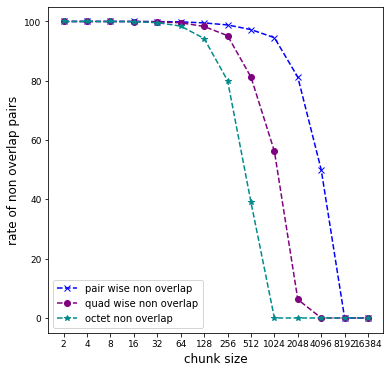

In [3]:


chunk_sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

### first matrix

rates1 = np.empty(len(chunk_sizes))
rates1_4 = np.empty(len(chunk_sizes))
rates1_8 = np.empty(len(chunk_sizes))

# create an array of rates for different chunks
M1 = load_matrix(Mat1)
mat_size = M1.shape[0]
for i in range(len(chunk_sizes)):
    bit_mapped = Bit_mapping(M1, mat_size, chunk_sizes[i])
    rate = cal_non_overlap_rate(bit_mapped) * 100
    rate_4 = cal_non_overlap_rate_4partition(bit_mapped) *100
    rate_8 = cal_non_overlap_rate_8partition(bit_mapped) *100
    print('bitmapped matrix size is: ',bit_mapped.shape[0])
    print(Text.BOLD_START + Text.GREEN + 'chunk size is: ' + str(chunk_sizes[i]) + Text.END)
    print(Text.BOLD_START + Text.BLUE +'rate for 2 partitions is: ' + str(rate) + Text.END)
    print(Text.BOLD_START + Text.PURPLE +'rate for 4 partitions is: ' + str(rate_4) + Text.END)
    print(Text.BOLD_START + Text.DARKCYAN +'rate for 8 partitions is: ' + str(rate_8) + Text.END)
    print('---------------------------------------------------')
    rates1[i]= rate
    rates1_4[i] = rate_4
    rates1_8[i] = rate_8


## diagrams ###    
optimal_chunk = find_optimal_chunk_size(rates1, chunk_sizes)
optimal_chunk_4 = find_optimal_chunk_size(rates1_4, chunk_sizes)
optimal_chunk_8 = find_optimal_chunk_size(rates1_8, chunk_sizes)

print(Text.BOLD_START + Text.CYAN +'*******************************'+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for 2 partitions is', str(optimal_chunk)+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for 4 partitions is', str(optimal_chunk_4)+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for 8 partitions is', str(optimal_chunk_8)+ Text.END)
print(Text.BOLD_START + Text.CYAN + '*******************************' + Text.END)

fig = plt.figure(figsize = (6, 6))
default_x_ticks = range(len(chunk_sizes))
plt.plot(default_x_ticks, rates1, marker='x', linestyle='--', color='b', label='pair wise non overlap')
plt.plot(default_x_ticks, rates1_4, marker='o', linestyle='--', color='purple', label='quad wise non overlap')
plt.plot(default_x_ticks, rates1_8, marker='*', linestyle='--', color='darkcyan', label='octet non overlap')
plt.xticks(default_x_ticks, chunk_sizes)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('chunk size', fontsize = 12)
plt.ylabel('rate of non overlap pairs', fontsize = 12)
plt.legend()
plt.show()


num of overlaps =  0
num of overlaps for FOUR partition =  0
num of overlaps for EIGHT partition =  0
bitmapped matrix size is:  8192
chunk size is: 2
rate for 2 partitions is: 100.0
rate for 4 partitions is: 100.0
rate for 8 partitions is: 100.0
---------------------------------------------------
num of overlaps =  0
num of overlaps for FOUR partition =  0
num of overlaps for EIGHT partition =  0
bitmapped matrix size is:  4096
chunk size is: 4
rate for 2 partitions is: 100.0
rate for 4 partitions is: 100.0
rate for 8 partitions is: 100.0
---------------------------------------------------
num of overlaps =  0
num of overlaps for FOUR partition =  0
num of overlaps for EIGHT partition =  0
bitmapped matrix size is:  2048
chunk size is: 8
rate for 2 partitions is: 100.0
rate for 4 partitions is: 100.0
rate for 8 partitions is: 100.0
---------------------------------------------------
num of overlaps =  0
num of overlaps for FOUR partition =  0
num of overlaps for EIGHT partition =  0
b

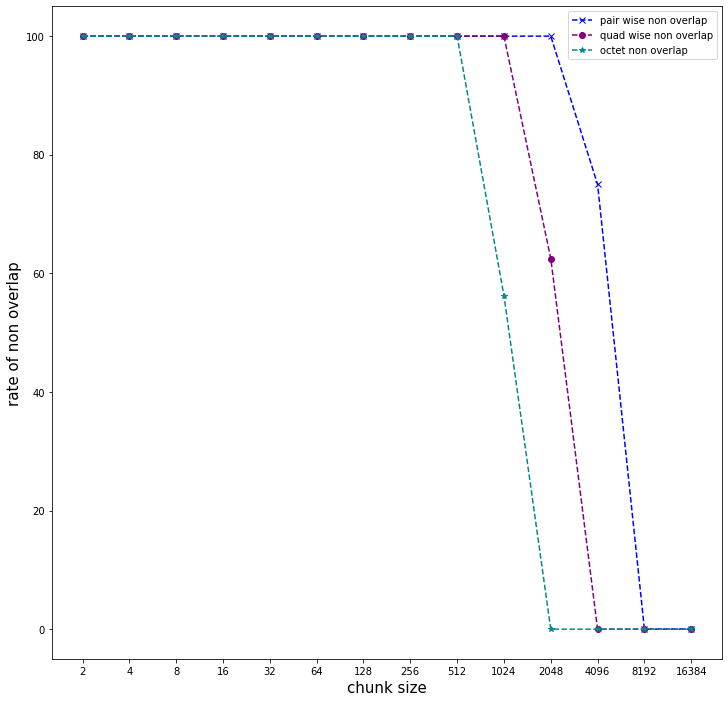

In [3]:
chunk_sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
##### second matrix
#semi diagnol matrix
rates2 = np.empty(len(chunk_sizes))
rates2_4 = np.empty(len(chunk_sizes))
rates2_8 = np.empty(len(chunk_sizes))
    
# create an array of rates for different chunks
M2 = load_matrix(Mat2)
mat_size = M2.shape[0]
for i in range(len(chunk_sizes)):
    bit_mapped = Bit_mapping(M2, mat_size, chunk_sizes[i])
    rate = cal_non_overlap_rate(bit_mapped) * 100
    rate_4 = cal_non_overlap_rate_4partition(bit_mapped) *100
    rate_8 = cal_non_overlap_rate_8partition(bit_mapped) *100
    print('bitmapped matrix size is: ',bit_mapped.shape[0])
    print(Text.BOLD_START + Text.GREEN + 'chunk size is: ' + str(chunk_sizes[i]) + Text.END)
    print(Text.BOLD_START + Text.BLUE +'rate for 2 partitions is: ' + str(rate) + Text.END)
    print(Text.BOLD_START + Text.PURPLE +'rate for 4 partitions is: ' + str(rate_4) + Text.END)
    print(Text.BOLD_START + Text.DARKCYAN +'rate for 8 partitions is: ' + str(rate_8) + Text.END)
    print('---------------------------------------------------')
    rates2[i]= rate
    rates2_4[i] = rate_4
    rates2_8[i] = rate_8


## diagrams ###    
optimal_chunk = find_optimal_chunk_size(rates2, chunk_sizes)
optimal_chunk_4 = find_optimal_chunk_size(rates2_4, chunk_sizes)
optimal_chunk_8 = find_optimal_chunk_size(rates2_8, chunk_sizes)
print(Text.BOLD_START + Text.CYAN +'*******************************'+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for pair wise is', str(optimal_chunk)+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for quad wise is', str(optimal_chunk_4)+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for octet is', str(optimal_chunk_8)+ Text.END)
print(Text.BOLD_START + Text.CYAN + '*******************************' + Text.END)

fig = plt.figure(figsize = (12, 12))
default_x_ticks = range(len(chunk_sizes))
plt.plot(default_x_ticks, rates2, marker='x', linestyle='--', color='b', label='pair wise non overlap')
plt.plot(default_x_ticks, rates2_4, marker='o', linestyle='--', color='purple', label='quad wise non overlap')
plt.plot(default_x_ticks, rates2_8, marker='*', linestyle='--', color='darkcyan', label='octet non overlap')
plt.xticks(default_x_ticks, chunk_sizes)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('chunk size', fontsize = 15)
plt.ylabel('rate of non overlap', fontsize = 15)
plt.legend()
plt.show()


num of overlaps =  2
num of overlaps for FOUR partition =  12
num of overlaps for EIGHT partition =  38
bitmapped matrix size is:  8192
chunk size is: 2
rate for 2 partitions is: 99.99999403953552
rate for 4 partitions is: 99.99992847442627
rate for 8 partitions is: 99.9995470046997
---------------------------------------------------
num of overlaps =  7
num of overlaps for FOUR partition =  36
num of overlaps for EIGHT partition =  90
bitmapped matrix size is:  4096
chunk size is: 4
rate for 2 partitions is: 99.99991655349731
rate for 4 partitions is: 99.99914169311523
rate for 8 partitions is: 99.99570846557617
---------------------------------------------------
num of overlaps =  7
num of overlaps for FOUR partition =  43
num of overlaps for EIGHT partition =  123
bitmapped matrix size is:  2048
chunk size is: 8
rate for 2 partitions is: 99.99966621398926
rate for 4 partitions is: 99.99589920043945
rate for 8 partitions is: 99.9765396118164
------------------------------------------

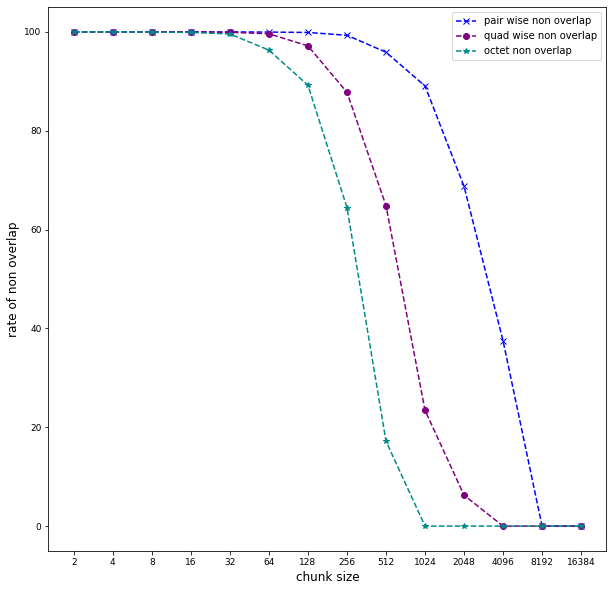

In [7]:

##### Third matrix


rates3 = np.empty(len(chunk_sizes))
rates3_4 = np.empty(len(chunk_sizes))
rates3_8 = np.empty(len(chunk_sizes))
# create an array of rates for different chunks
M3 = load_matrix(Mat3)
mat_size = M3.shape[0]
for i in range(len(chunk_sizes)):
    bit_mapped = Bit_mapping(M3, mat_size, chunk_sizes[i])
    rate = cal_non_overlap_rate(bit_mapped) * 100
    rate_4 = cal_non_overlap_rate_4partition(bit_mapped) *100
    rate_8= cal_non_overlap_rate_8partition(bit_mapped) *100
    print('bitmapped matrix size is: ',bit_mapped.shape[0])
    print(Text.BOLD_START + Text.GREEN + 'chunk size is: ' + str(chunk_sizes[i]) + Text.END)
    print(Text.BOLD_START + Text.BLUE +'rate for 2 partitions is: ' + str(rate) + Text.END)
    print(Text.BOLD_START + Text.PURPLE +'rate for 4 partitions is: ' + str(rate_4) + Text.END)
    print(Text.BOLD_START + Text.DARKCYAN +'rate for 8 partitions is: ' + str(rate_8) + Text.END)
    print('---------------------------------------------------')
    rates3[i]= rate
    rates3_4[i] = rate_4
    rates3_8[i] = rate_8


## diagrams ###    
optimal_chunk = find_optimal_chunk_size(rates3, chunk_sizes)
optimal_chunk_4 = find_optimal_chunk_size(rates3_4, chunk_sizes)
optimal_chunk_8 = find_optimal_chunk_size(rates3_8, chunk_sizes)
print(Text.BOLD_START + Text.CYAN +'*******************************'+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for pair wise is', str(optimal_chunk)+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for quad wise is', str(optimal_chunk_4)+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for octet is', str(optimal_chunk_8)+ Text.END)
print(Text.BOLD_START + Text.CYAN + '*******************************' + Text.END)

fig = plt.figure(figsize = (10, 10))
default_x_ticks = range(len(chunk_sizes))
plt.plot(default_x_ticks, rates3, marker='x', linestyle='--', color='b', label='pair wise non overlap')
plt.plot(default_x_ticks, rates3_4, marker='o', linestyle='--', color='purple', label='quad wise non overlap')
plt.plot(default_x_ticks, rates3_8, marker='*', linestyle='--', color='darkcyan', label='octet non overlap')
plt.xticks(default_x_ticks, chunk_sizes)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('chunk size', fontsize = 12)
plt.ylabel('rate of non overlap', fontsize = 12)
plt.legend()
plt.show()


num of overlaps =  14
num of overlaps for FOUR partition =  44
num of overlaps for EIGHT partition =  100
bitmapped matrix size is:  8192
chunk size is: 2
rate for 2 partitions is: 99.99995827674866
rate for 4 partitions is: 99.99973773956299
rate for 8 partitions is: 99.99880790710449
---------------------------------------------------
num of overlaps =  35
num of overlaps for FOUR partition =  82
num of overlaps for EIGHT partition =  174
bitmapped matrix size is:  4096
chunk size is: 4
rate for 2 partitions is: 99.99958276748657
rate for 4 partitions is: 99.99804496765137
rate for 8 partitions is: 99.99170303344727
---------------------------------------------------
num of overlaps =  61
num of overlaps for FOUR partition =  136
num of overlaps for EIGHT partition =  299
bitmapped matrix size is:  2048
chunk size is: 8
rate for 2 partitions is: 99.99709129333496
rate for 4 partitions is: 99.98703002929688
rate for 8 partitions is: 99.9429702758789
-----------------------------------

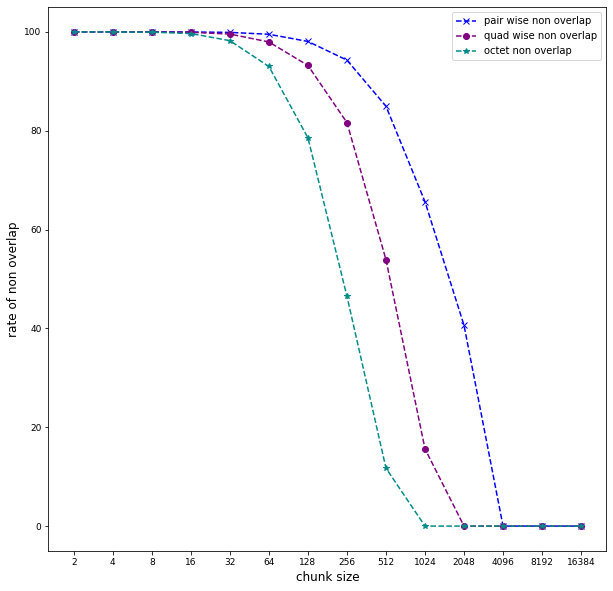

In [5]:

##### Forth matrix
chunk_sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

rates4 = np.empty(len(chunk_sizes))
rates4_4 = np.empty(len(chunk_sizes))
rates4_8 = np.empty(len(chunk_sizes))
# create an array of rates for different chunks
M4 = load_matrix(Mat4)
mat_size = M4.shape[0]
for i in range(len(chunk_sizes)):
    bit_mapped = Bit_mapping(M4, mat_size, chunk_sizes[i])
    rate = cal_non_overlap_rate(bit_mapped) * 100
    rate_4 = cal_non_overlap_rate_4partition(bit_mapped) *100
    rate_8= cal_non_overlap_rate_8partition(bit_mapped) *100
    print('bitmapped matrix size is: ',bit_mapped.shape[0])
    print(Text.BOLD_START + Text.GREEN + 'chunk size is: ' + str(chunk_sizes[i]) + Text.END)
    print(Text.BOLD_START + Text.BLUE +'rate for 2 partitions is: ' + str(rate) + Text.END)
    print(Text.BOLD_START + Text.PURPLE +'rate for 4 partitions is: ' + str(rate_4) + Text.END)
    print(Text.BOLD_START + Text.DARKCYAN +'rate for 8 partitions is: ' + str(rate_8) + Text.END)
    print('---------------------------------------------------')
    rates4[i]= rate
    rates4_4[i] = rate_4
    rates4_8[i] = rate_8


## diagrams ###    
optimal_chunk = find_optimal_chunk_size(rates4, chunk_sizes)
optimal_chunk_4 = find_optimal_chunk_size(rates4_4, chunk_sizes)
optimal_chunk_8 = find_optimal_chunk_size(rates4_8, chunk_sizes)
print(Text.BOLD_START + Text.CYAN +'*******************************'+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for pair wise is', str(optimal_chunk)+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for quad wise is', str(optimal_chunk_4)+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for octet is', str(optimal_chunk_8)+ Text.END)
print(Text.BOLD_START + Text.CYAN + '*******************************' + Text.END)

fig = plt.figure(figsize = (10, 10))
default_x_ticks = range(len(chunk_sizes))
plt.plot(default_x_ticks, rates4, marker='x', linestyle='--', color='b', label='pair wise non overlap')
plt.plot(default_x_ticks, rates4_4, marker='o', linestyle='--', color='purple', label='quad wise non overlap')
plt.plot(default_x_ticks, rates4_8, marker='*', linestyle='--', color='darkcyan', label='octet non overlap')
plt.xticks(default_x_ticks, chunk_sizes)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('chunk size', fontsize = 12)
plt.ylabel('rate of non overlap', fontsize = 12)
plt.legend()
plt.show()


num of overlaps =  95
num of overlaps for FOUR partition =  236
num of overlaps for EIGHT partition =  236
bitmapped matrix size is:  8192
chunk size is: 2
rate for 2 partitions is: 99.99971687793732
rate for 4 partitions is: 99.9985933303833
rate for 8 partitions is: 99.9971866607666
---------------------------------------------------
num of overlaps =  144
num of overlaps for FOUR partition =  437
num of overlaps for EIGHT partition =  438
bitmapped matrix size is:  4096
chunk size is: 4
rate for 2 partitions is: 99.99828338623047
rate for 4 partitions is: 99.98958110809326
rate for 8 partitions is: 99.9791145324707
---------------------------------------------------
num of overlaps =  104
num of overlaps for FOUR partition =  425
num of overlaps for EIGHT partition =  428
bitmapped matrix size is:  2048
chunk size is: 8
rate for 2 partitions is: 99.99504089355469
rate for 4 partitions is: 99.95946884155273
rate for 8 partitions is: 99.91836547851562
---------------------------------

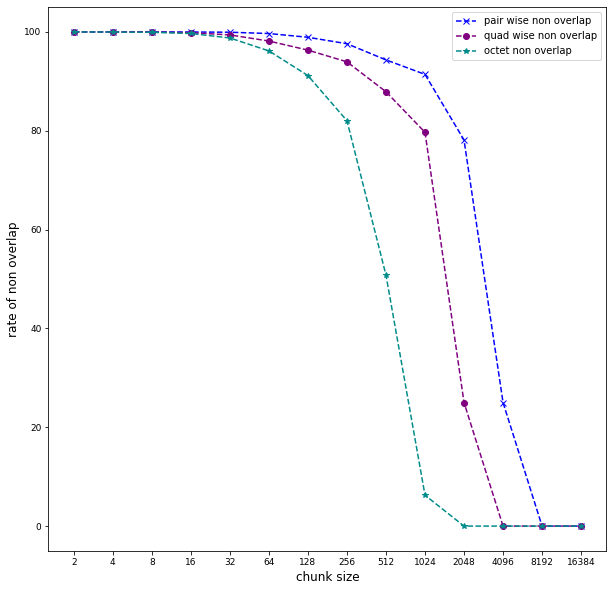

In [6]:

##### Fifth matrix


rates5 = np.empty(len(chunk_sizes))
rates5_4 = np.empty(len(chunk_sizes))
rates5_8 = np.empty(len(chunk_sizes))
# create an array of rates for different chunks
M5 = load_matrix(Mat5)
mat_size = M5.shape[0]
for i in range(len(chunk_sizes)):
    bit_mapped = Bit_mapping(M5, mat_size, chunk_sizes[i])
    rate = cal_non_overlap_rate(bit_mapped) * 100
    rate_4 = cal_non_overlap_rate_4partition(bit_mapped) *100
    rate_8= cal_non_overlap_rate_8partition(bit_mapped) *100
    print('bitmapped matrix size is: ',bit_mapped.shape[0])
    print(Text.BOLD_START + Text.GREEN + 'chunk size is: ' + str(chunk_sizes[i]) + Text.END)
    print(Text.BOLD_START + Text.BLUE +'rate for 2 partitions is: ' + str(rate) + Text.END)
    print(Text.BOLD_START + Text.PURPLE +'rate for 4 partitions is: ' + str(rate_4) + Text.END)
    print(Text.BOLD_START + Text.DARKCYAN +'rate for 8 partitions is: ' + str(rate_8) + Text.END)
    print('---------------------------------------------------')
    rates5[i]= rate
    rates5_4[i] = rate_4
    rates5_8[i] = rate_8


## diagrams ###    
optimal_chunk = find_optimal_chunk_size(rates5, chunk_sizes)
optimal_chunk_4 = find_optimal_chunk_size(rates5_4, chunk_sizes)
optimal_chunk_8 = find_optimal_chunk_size(rates5_8, chunk_sizes)
print(Text.BOLD_START + Text.CYAN +'*******************************'+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for pair wise is', str(optimal_chunk)+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for quad wise is', str(optimal_chunk_4)+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for octet is', str(optimal_chunk_8)+ Text.END)
print(Text.BOLD_START + Text.CYAN + '*******************************' + Text.END)

fig = plt.figure(figsize = (10, 10))
default_x_ticks = range(len(chunk_sizes))
plt.plot(default_x_ticks, rates5, marker='x', linestyle='--', color='b', label='pair wise non overlap')
plt.plot(default_x_ticks, rates5_4, marker='o', linestyle='--', color='purple', label='quad wise non overlap')
plt.plot(default_x_ticks, rates5_8, marker='*', linestyle='--', color='darkcyan', label='octet non overlap')
plt.xticks(default_x_ticks, chunk_sizes)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('chunk size', fontsize = 12)
plt.ylabel('rate of non overlap', fontsize = 12)
plt.legend()
plt.show()


num of overlaps =  14
num of overlaps for FOUR partition =  44
num of overlaps for EIGHT partition =  100
bitmapped matrix size is:  8192
chunk size is: 2
rate for 2 partitions is: 99.99995827674866
rate for 4 partitions is: 99.99973773956299
rate for 8 partitions is: 99.99880790710449
---------------------------------------------------
num of overlaps =  35
num of overlaps for FOUR partition =  82
num of overlaps for EIGHT partition =  174
bitmapped matrix size is:  4096
chunk size is: 4
rate for 2 partitions is: 99.99958276748657
rate for 4 partitions is: 99.99804496765137
rate for 8 partitions is: 99.99170303344727
---------------------------------------------------
num of overlaps =  61
num of overlaps for FOUR partition =  136
num of overlaps for EIGHT partition =  299
bitmapped matrix size is:  2048
chunk size is: 8
rate for 2 partitions is: 99.99709129333496
rate for 4 partitions is: 99.98703002929688
rate for 8 partitions is: 99.9429702758789
-----------------------------------

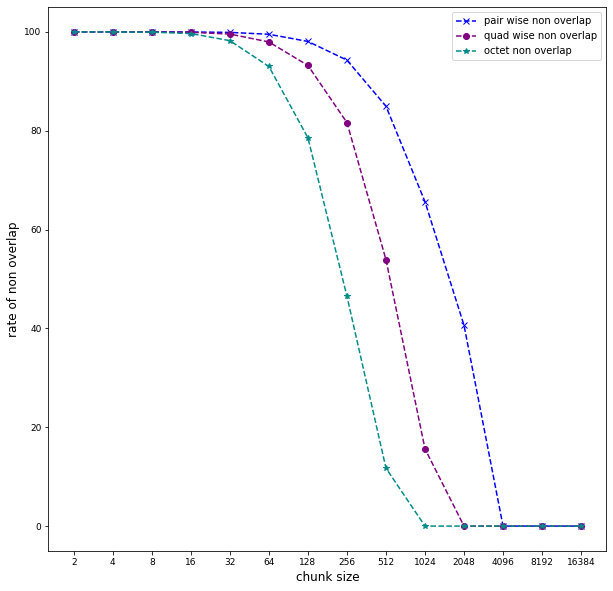

In [7]:

##### Sixth matrix


rates6 = np.empty(len(chunk_sizes))
rates6_4 = np.empty(len(chunk_sizes))
rates6_8 = np.empty(len(chunk_sizes))
# create an array of rates for different chunks
M6 = load_matrix(Mat6)
mat_size = M6.shape[0]
for i in range(len(chunk_sizes)):
    bit_mapped = Bit_mapping(M4, mat_size, chunk_sizes[i])
    rate = cal_non_overlap_rate(bit_mapped) * 100
    rate_4 = cal_non_overlap_rate_4partition(bit_mapped) *100
    rate_8= cal_non_overlap_rate_8partition(bit_mapped) *100
    print('bitmapped matrix size is: ',bit_mapped.shape[0])
    print(Text.BOLD_START + Text.GREEN + 'chunk size is: ' + str(chunk_sizes[i]) + Text.END)
    print(Text.BOLD_START + Text.BLUE +'rate for 2 partitions is: ' + str(rate) + Text.END)
    print(Text.BOLD_START + Text.PURPLE +'rate for 4 partitions is: ' + str(rate_4) + Text.END)
    print(Text.BOLD_START + Text.DARKCYAN +'rate for 8 partitions is: ' + str(rate_8) + Text.END)
    print('---------------------------------------------------')
    rates6[i]= rate
    rates6_4[i] = rate_4
    rates6_8[i] = rate_8


## diagrams ###    
optimal_chunk = find_optimal_chunk_size(rates6, chunk_sizes)
optimal_chunk_4 = find_optimal_chunk_size(rates6_4, chunk_sizes)
optimal_chunk_8 = find_optimal_chunk_size(rates6_8, chunk_sizes)
print(Text.BOLD_START + Text.CYAN +'*******************************'+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for pair wise is', str(optimal_chunk)+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for quad wise is', str(optimal_chunk_4)+ Text.END)
print(Text.BOLD_START + Text.CYAN + 'Optimal chunk size for octet is', str(optimal_chunk_8)+ Text.END)
print(Text.BOLD_START + Text.CYAN + '*******************************' + Text.END)

fig = plt.figure(figsize = (10, 10))
default_x_ticks = range(len(chunk_sizes))
plt.plot(default_x_ticks, rates6, marker='x', linestyle='--', color='b', label='pair wise non overlap')
plt.plot(default_x_ticks, rates6_4, marker='o', linestyle='--', color='purple', label='quad wise non overlap')
plt.plot(default_x_ticks, rates6_8, marker='*', linestyle='--', color='darkcyan', label='octet non overlap')
plt.xticks(default_x_ticks, chunk_sizes)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('chunk size', fontsize = 12)
plt.ylabel('rate of non overlap', fontsize = 12)
plt.legend()
plt.show()
